<a href="https://colab.research.google.com/github/Anybody99901/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4 - Sentiment Analysis on Twitter Data

In this task, we analyze sentiment patterns in Twitter data to understand public opinions and attitudes toward specific entities (e.g., brands, companies, people). We'll use a labeled dataset with sentiments and apply data preprocessing, visualization, and basic modeling.

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 1: Load the Dataset

We load the `twitter_training.csv` and `twitter_validation.csv` files for analysis. These datasets include labeled tweets with associated sentiments for various entities.

In [14]:

train_df = pd.read_csv('twitter_training.csv', header=None)
val_df = pd.read_csv('twitter_validation.csv', header=None)

train_df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
val_df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

train_df.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Step 2: Explore the Data

Let's check the size, class distribution, and any missing data in the training dataset.

In [15]:

print("Training Data Shape:", train_df.shape)
print("Validation Data Shape:", val_df.shape)

# Class distribution
print("\nSentiment distribution:")
print(train_df['Sentiment'].value_counts())

# Check for missing values
train_df.isnull().sum()

Training Data Shape: (74682, 4)
Validation Data Shape: (1000, 4)

Sentiment distribution:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


,0
ID,0
Entity,0
Sentiment,0
Tweet,686


## Step 3: Visualize Sentiment Distribution

We plot the distribution of sentiments to understand class imbalance, if any.

<ipython-input-16-85b61406a853>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Sentiment', palette='Set2')


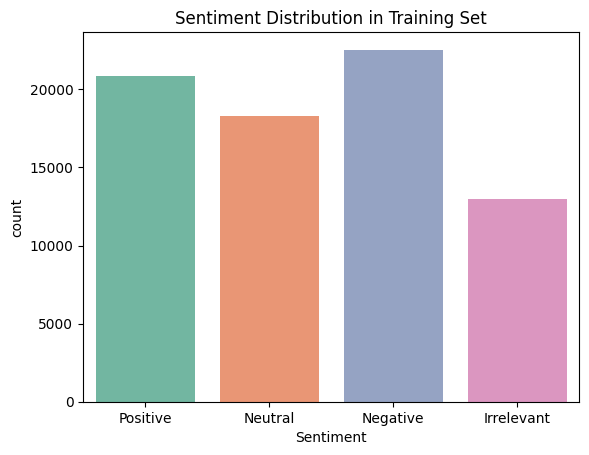

In [16]:

sns.countplot(data=train_df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution in Training Set")
plt.show()

## Step 4: Preprocessing the Tweets

We clean the tweets by:
- Removing links, mentions, hashtags
- Removing special characters and numbers
- Removing stopwords

In [17]:

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply cleaning safely
train_df['Clean_Tweet'] = train_df['Tweet'].astype(str).apply(clean_text)
train_df[['Tweet', 'Clean_Tweet']].head()

,Tweet,Clean_Tweet
0,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,I am coming to the borders and I will kill you...,coming borders kill
2,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,im coming on borderlands and i will murder you...,im coming borderlands murder
4,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


## Step 5: Word Cloud Visualization

We visualize the most frequent words for each sentiment using WordCloud.

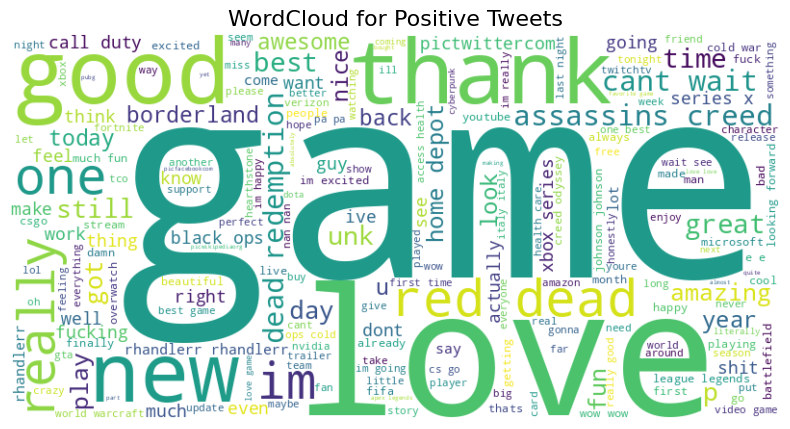

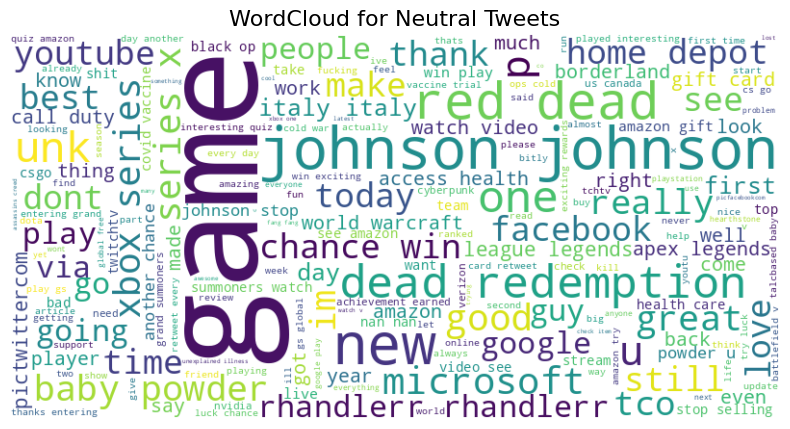

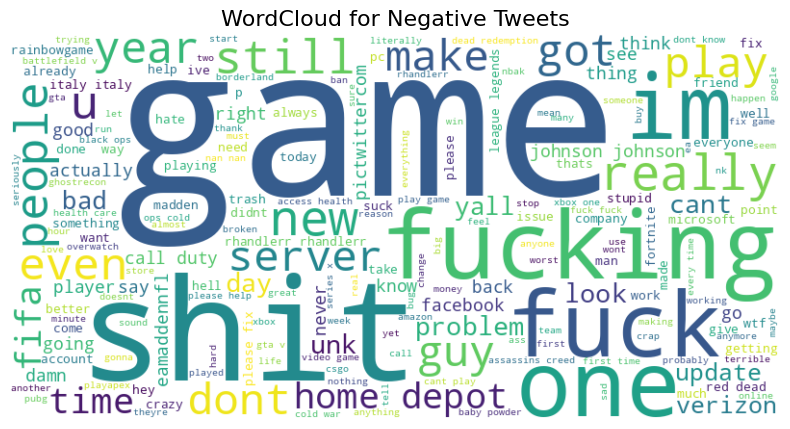

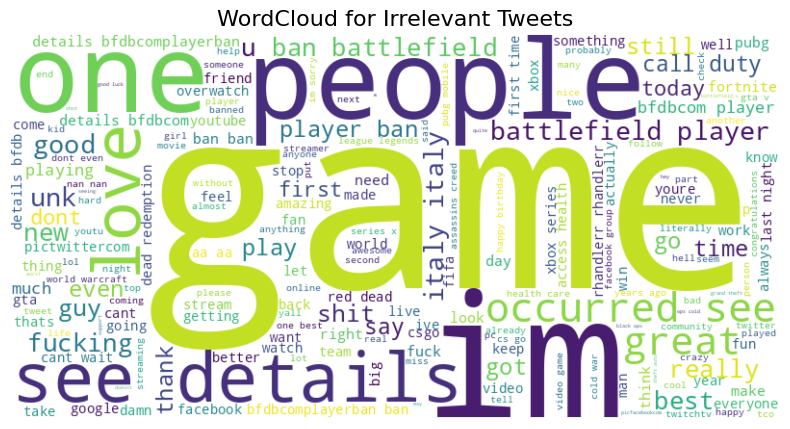

In [18]:

def generate_wordcloud(sentiment):
    text = ' '.join(train_df[train_df['Sentiment'] == sentiment]['Clean_Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud for {sentiment} Tweets", fontsize=16)
    plt.axis('off')
    plt.show()

for sentiment in train_df['Sentiment'].unique():
    generate_wordcloud(sentiment)

## Step 6: Train a Sentiment Classifier

We use the Naive Bayes classifier with CountVectorizer to classify the sentiments.

In [20]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_df['Clean_Tweet'])
y = train_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Step 7: Model Evaluation

Let's evaluate our sentiment model on the test set using accuracy, confusion matrix, and classification report.

Accuracy: 0.7278569993974694

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.80      0.57      0.67      2592
    Negative       0.70      0.84      0.76      4519
     Neutral       0.77      0.62      0.68      3596
    Positive       0.71      0.79      0.75      4230

    accuracy                           0.73     14937
   macro avg       0.74      0.71      0.72     14937
weighted avg       0.74      0.73      0.72     14937



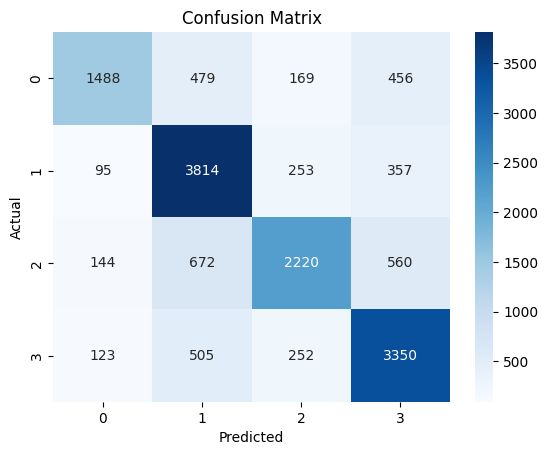

In [21]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()